**[DataSet (Links to an external site.)](https://github.com/DataGlacier/DataSets.git "Link")**


# Packages

In [ ]:
# import libraries
import re
import sys
import random
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from copy import deepcopy
import matplotlib.pyplot as plt

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

from datetime import datetime,date

# connect google drive
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

mpl.rcParams['font.sans-serif'] = ['SimHei']
%matplotlib inline
# %matplotlib notebook
sns.set()

from google.colab import drive
drive.mount('/content/drive')

sys.path.append('/content/drive/My Drive/Glacier-W2-EDA')

from preprocess import *

%cd /content/drive/My Drive/Glacier-W2-EDA/

!ls

Mounted at /content/drive
/content/drive/My Drive/Glacier-W2-EDA
DataSets-main  EDA.ipynb  preprocess.py  __pycache__


# Load and clean

In [ ]:
data_path="DataSets-main/"
start_date="31/01/2016"
end_date="31/12/2018"

df_cab=pd.read_csv(data_path+"Cab_Data.csv")
df_city=pd.read_csv(data_path+"City.csv")
df_cum=pd.read_csv(data_path+"Customer_ID.csv")
df_tran=pd.read_csv(data_path+"Transaction_ID.csv")

df_1=pd.merge(df_cab,df_city,on="City")
df_2=pd.merge(df_tran,df_cum,on="Customer ID")
df=pd.merge(df_1,df_2,on="Transaction ID").sort_values(by=['Transaction ID'])

df.set_index('Transaction ID', inplace=True)
df["Date of Travel"]=df["Date of Travel"].apply(lambda x: date.fromordinal(date.toordinal(date(2016,1,1))+x-42370))
df["Profit"]=df["Price Charged"]-df["Cost of Trip"]
df["Cost per KM"]=df["Cost of Trip"]/df["KM Travelled"]
df["Price per KM"]=df["Price Charged"]/df["KM Travelled"]
df["Profit per KM"]=df["Profit"]/df["KM Travelled"]

df["Population"]=df["Population"].str.replace(",","").astype('int64')

df["Date"]=pd.to_datetime(df["Date of Travel"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day of week"]=df["Date"].dt.dayofweek # Mon:0 Sun:6

# df.to_csv(data_path+"merge.csv")

In [ ]:
# colnames
colnames=df.columns
de_colnames="Company"
# inde_colnames=list(set(raw_df_mat.columns).difference(set(de_colnames)))
inde_colnames=[col for col in colnames if col not in de_colnames]

num_colnames=[]
str_colnames=[]
for col in colnames:
    if df[col].dtype in ['object','<M8[ns]']:
        str_colnames.append(col)
    else:
        num_colnames.append(col)

print(str_colnames)
print(num_colnames)

['Company', 'City', 'Population', 'Users', 'Payment_Mode', 'Gender']
['Transaction ID', 'Date of Travel', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Customer ID', 'Age', 'Income (USD/Month)']


In [ ]:
def head_df(df):
    print(df.shape)
    return df.head()

In [ ]:
head_df(df)

(359392, 14)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card,Male,33,8536


# Simple summary stat

In [ ]:
show_describe(df)

shape: 359392


head info:
   Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip Population     Users  Customer ID Payment_Mode  \
0         370.95       313.635   814,885    24,701         29290         Card   
1         358.52       334.854   814,885    24,701         27703         Card   
2         125.20        97.632   814,885    24,701         28712         Cash   
3         377.40       351.602   814,885    24,701         28020         Cash   
4         114.62        97.776   814,885    24,701         27182         Card   

  Gender  Age  Income (USD/Month)  
0   Male   28    

non-null columns

In [ ]:
df["Company"].value_counts()

df_y=df[df.Company=="Yellow Cab"]
print("Yellow Cab:", len(df_y))
df_p=df[df.Company=="Pink Cab"]
print("Pink Cab:", len(df_p))

274681
84711


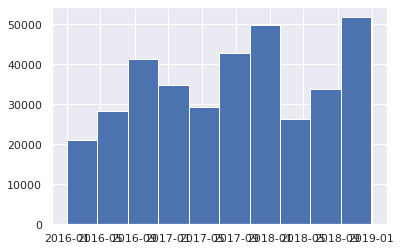

In [ ]:
df["Date of Travel"].hist();

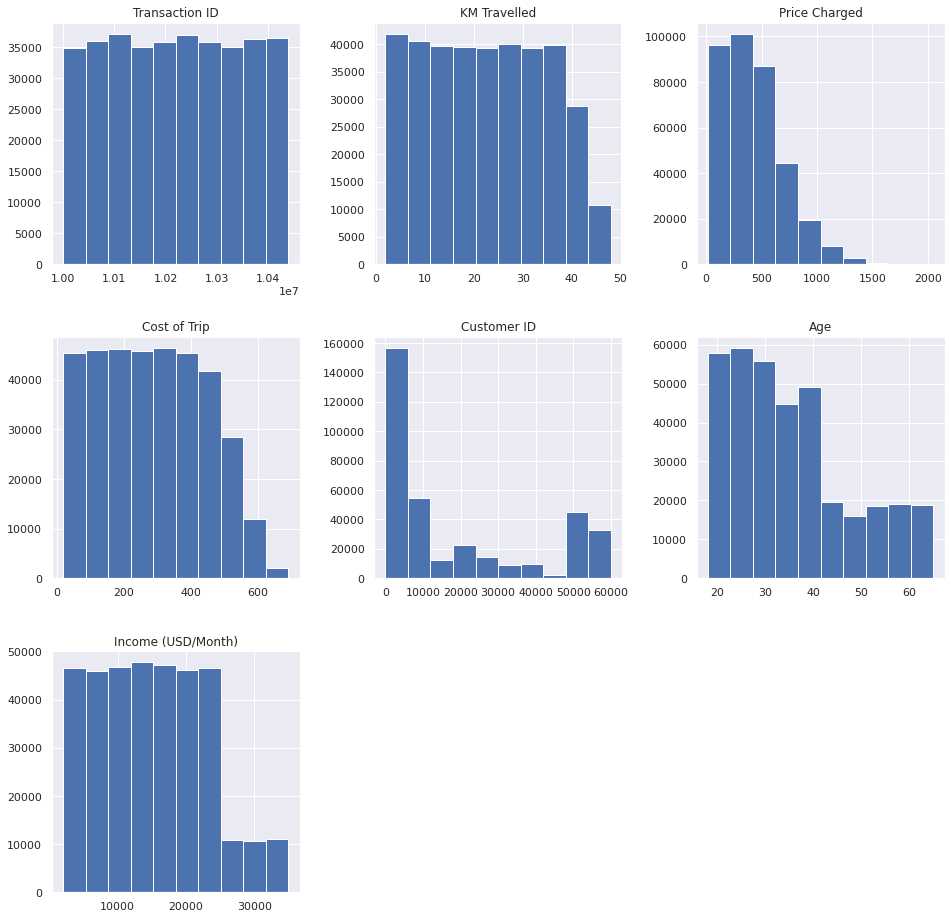

In [ ]:
# for col in ["Date of Travel"]+num_colnames:
#     df[col].hist();

df[["Date of Travel"]+num_colnames].hist(figsize=(16, 16));

In [ ]:
def count_plot()
    plt.figure(figsize=(8,6))
    sns.countplot(cat_df.G1)
    plt.title('Distribution of the First Period Portuguese Language Grade',fontsize=20)
    plt.xlabel('First Period Math Grade', fontsize=16)
    plt.ylabel('Number of Student', fontsize=16)

    plt.savefig(fig_root_path+"G1_Distribution_P.png",dpi=dpi)

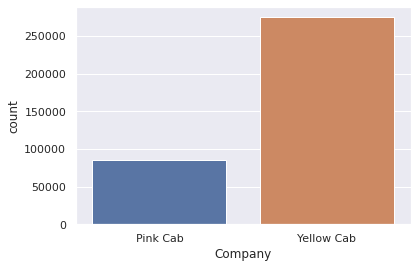

In [ ]:
sns.countplot(df.Company);

![](https://s3.bmp.ovh/imgs/2022/10/15/3985b1085966c68a.png)

# Profit analysis

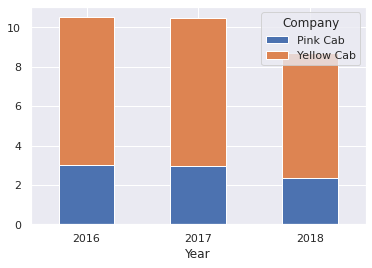

In [ ]:
df.groupby(['Year','Company'])["Profit per KM"].agg('mean')  \
.unstack().plot(kind='bar',stacked=True,rot=False);

### How much will cabs earn per KM?

![](https://s3.bmp.ovh/imgs/2022/10/15/a0bf3072a65248da.png)

As shown, yellow cab earns at least two times profits than pink cab per KM.

### What are percentags that a ride can make profit?

![](https://s3.bmp.ovh/imgs/2022/10/15/86e29b8c1de5b3a2.png)

After comparison, yellow cab has a higher percentage, which means it is more possible for yellow cab to make a profit for every ride.

### Profit comparison in total for each year

![](https://s3.bmp.ovh/imgs/2022/10/15/574c3f233cd0444d.png)

Yellow cab makes much higher profits than pink cab.

# City wise

[![xwIsAg.png](https://s1.ax1x.com/2022/10/15/xwIsAg.png)](https://imgse.com/i/xwIsAg)

### What are the percentages of rides that can make profit in each city?

![](https://s3.bmp.ovh/imgs/2022/10/15/7cf4a21dca007e66.png)

In comparison to the pinck cab, yellow cab performe better with relatively higher percentages of profitable rides.

### Which cab has more users in each city?

![](https://s3.bmp.ovh/imgs/2022/10/15/007368cc5807e47c.png)

Percertages of yellow cab in each city is bigger than pink one in 15 cities out of 19. 

# Gender wise

### Does gender effects the profits?

![](https://s3.bmp.ovh/imgs/2022/10/15/52af5f1babadb161.png)

As shown, gender does not make difference and there is not distinct difference between two cabs.

# Income wise

### Is there any difference of distributions of customer income groups between two cabs?

![](https://s3.bmp.ovh/imgs/2022/10/15/9e1b7e9c220ec67d.png)

![](https://s3.bmp.ovh/imgs/2022/10/15/2c69b3d94596bdff.png)

As shown, they are similar. These three classes provide the same contribution to profits.

# Age wise

### Is there any difference of distributions of customer age groups between two cabs?

![](https://s3.bmp.ovh/imgs/2022/10/15/95b9645a6c192ead.png)

![](https://s3.bmp.ovh/imgs/2022/10/15/c416582af579f01a.png)

As shown, there is no big difference. Both of two companies cover all age groups with similar distributions.

# Time series wise

In [ ]:
p="""
select Company, sum(Year=2016) as '2016', sum(Year=2017) as '2017',sum(Year=2018) as '2018'
from df
group by Company
"""


# """
# select Company, Profit
# from df
# limit 10;
# """ 

temp=pysqldf(p)

# pd.crosstab(index=df["Company"],columns=df["Year"])

temp.stack().unstack()

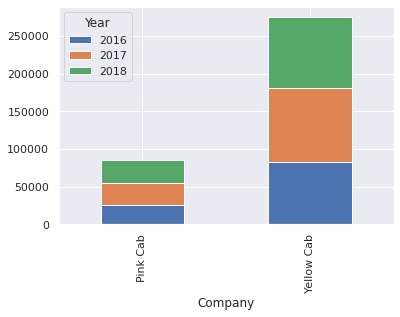

In [ ]:
temp.plot(kind='bar',stacked=True);

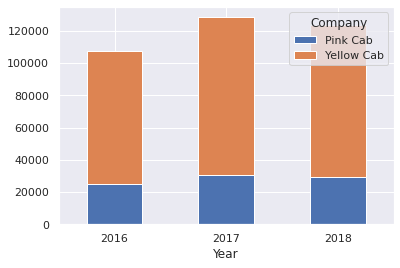

In [ ]:
df.groupby(['Year','Company']).size().unstack().plot(kind='bar',stacked=True,rot=False);

![](https://s3.bmp.ovh/imgs/2022/10/15/42519a24f02e0827.png)

### Is there any seasonality in number of cab service and profits in Quarter scale?

![](https://s3.bmp.ovh/imgs/2022/10/15/f9e744699506cc99.png)

As we can see, seasonality is shown in both cabs. Number of rides rises from Q1 to Q4 and decrease as Q1 comes, which means 4 quarters a cycle.

![](https://s3.bmp.ovh/imgs/2022/10/15/db8bff08ad4f9a60.png)

Similar quarter patterns can be found in terms of Profit.

### Is there any seasonality in number of cab service in month scale?

![](https://s3.bmp.ovh/imgs/2022/10/15/db53938bf9c199a5.png)

An interesting founding: Number of rides is big on 3rd day of the month and it repeats similar pattern every 7 days.

### Is there any seasonality in number of customers and rides in day-of-week scale?

![](https://s3.bmp.ovh/imgs/2022/10/15/a519393a11b840c9.png)

As we go deeper, we can find the fact that on Friday, Saturday, and Sunday, demands and profits are usually much higher than other days of week.

[![xwIyNQ.png](https://s1.ax1x.com/2022/10/15/xwIyNQ.png)](https://imgse.com/i/xwIyNQ)

# Distance wise

### Is there any preference of cab services among various distances?

[![xwI6hj.png](https://s1.ax1x.com/2022/10/15/xwI6hj.png)](https://imgse.com/i/xwI6hj)

Yellow cab has customers almost uniform for all kinds of Trip, while Pink cab has relatively long trip customers, which means that its service to long trips is not so attractive.

# Forecast

[![xwIg9s.png](https://s1.ax1x.com/2022/10/15/xwIg9s.png)](https://imgse.com/i/xwIg9s)


[![xwI23n.png](https://s1.ax1x.com/2022/10/15/xwI23n.png)](https://imgse.com/i/xwI23n)

# Conclusion

As a result, yellow cab performes better than pink one in many ways and should be chosen for several reasons:
1. Yellow cab has much more competitve ability to make a profit.
2. Yellow cab covers more users in each city, which means higher potential.
3. Yellow cab has good services and cover all kinds of genders, incomes, and age groups.
4. There are obvious time patterns that we can dive deep to improve its profits.
5. Compared with pink cab, yellow provides better services in long trip and thus more chosen by customers. 
